In [2]:
import pandas as pd

def full_display(df):
    with pd.option_context('display.max_rows', None, 'display.max_columns', 10):
        display(df)

In [3]:
train_data = pd.read_csv('data/nl4opt_bio/train.txt', sep='\t', header=None)
train_data.columns = ['token', '1', '2', 'tag']
test_data = train_data[['token', 'tag']]

In [4]:
test_data = pd.read_csv('data/nl4opt_bio/test.txt', sep='\t', header=None)
test_data.columns = ['token', '1', '2', 'tag']
test_data = test_data[['token', 'tag']]

C:\Users\holaj\AppData\Local\Temp\ipykernel_35324\2727462997.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(top_tokens.index.values, rotation=45, ha='right')
C:\Users\holaj\AppData\Local\Temp\ipykernel_35324\2727462997.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(top_tokens.index.values, rotation=45, ha='right')


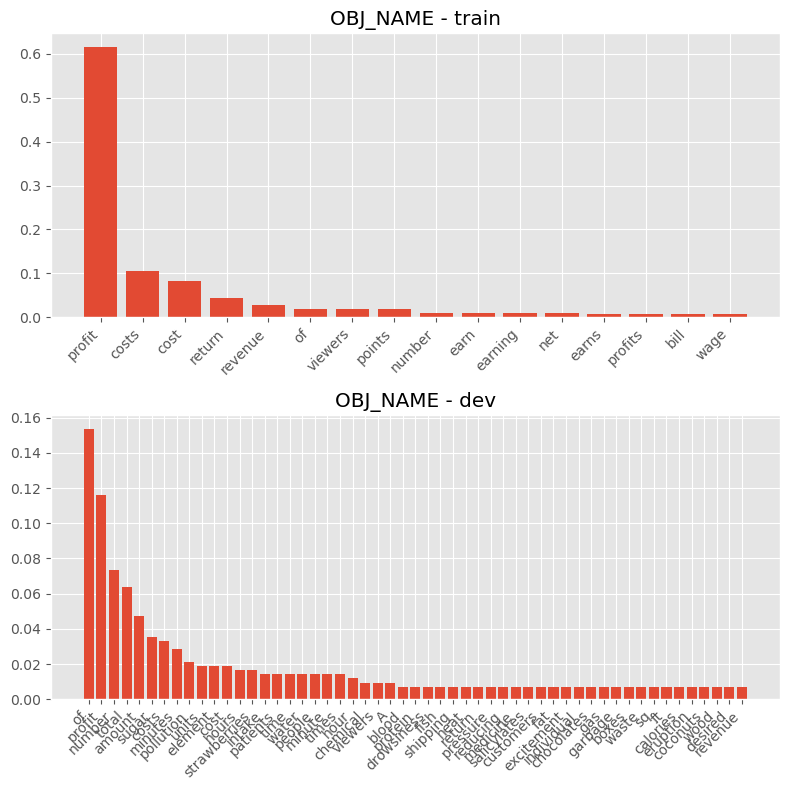

In [11]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')
# for tag in ['CONST_DIR', 'LIMIT', 'OBJ_DIR', 'OBJ_NAME', 'VAR', 'PARAM']:
for tag in ['OBJ_NAME']:
    # fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 3))
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8,8))
    
    slice = train_data[train_data.tag.map(lambda s: s.endswith(tag))]
    top_tokens = slice.token.value_counts()
    top_tokens = top_tokens[top_tokens/sum(top_tokens) > 5e-3]
    # top_tokens = top_tokens[top_tokens > len(top_tokens)/20]
    
    axes[0].set_title(f'{tag} - train')
    axes[0].bar(top_tokens.index.values, top_tokens/sum(top_tokens), )
    axes[0].set_xticklabels(top_tokens.index.values, rotation=45, ha='right')
    
    
    slice = test_data[test_data.tag.map(lambda s: s.endswith(tag))]
    top_tokens = slice.token.value_counts()
    top_tokens = top_tokens[top_tokens/sum(top_tokens) > 5e-3]
    # top_tokens = top_tokens[top_tokens > len(top_tokens)/20]
    
    axes[1].set_title(f'{tag} - dev')
    axes[1].bar(top_tokens.index.values, top_tokens/sum(top_tokens))
    axes[1].set_xticklabels(top_tokens.index.values, rotation=45, ha='right')
    
    plt.tight_layout()
    plt.show()